# Description

Runs k-means on the z_score_std version of the data.

# Environment variables

In [1]:
from IPython.display import display

import conf

N_JOBS = conf.GENERAL["N_JOBS"]
display(N_JOBS)

10

In [2]:
%env MKL_NUM_THREADS=$N_JOBS
%env OPEN_BLAS_NUM_THREADS=$N_JOBS
%env NUMEXPR_NUM_THREADS=$N_JOBS
%env OMP_NUM_THREADS=$N_JOBS

env: MKL_NUM_THREADS=10
env: OPEN_BLAS_NUM_THREADS=10
env: NUMEXPR_NUM_THREADS=10
env: OMP_NUM_THREADS=10


# Modules loading

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import generate_result_set_name

# Settings

In [5]:
np.random.seed(0)

In [6]:
INITIAL_RANDOM_STATE = 0

In [7]:
NULL_DIR = conf.RESULTS["CLUSTERING_NULL_DIR"] / "shuffle_genes"

## Input data

In [8]:
INPUT_SUBSET = "z_score_std"

In [9]:
INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [10]:
input_filepath = Path(
    NULL_DIR,
    "data_transformations",
    INPUT_SUBSET,
    f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/opt/data/results/clustering/null_sims/shuffle_genes/data_transformations/z_score_std/z_score_std-projection-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-projection-smultixcan-efo_partial-mashr-zscores'

## Clustering

In [11]:
from sklearn.cluster import KMeans

In [12]:
CLUSTERING_ATTRIBUTES_TO_SAVE = ["n_clusters"]

In [13]:
CLUSTERING_OPTIONS = {}

CLUSTERING_OPTIONS["K_MIN"] = 2
CLUSTERING_OPTIONS["K_MAX"] = 60  # sqrt(3749)
CLUSTERING_OPTIONS["N_REPS_PER_K"] = 5
CLUSTERING_OPTIONS["KMEANS_N_INIT"] = 10

display(CLUSTERING_OPTIONS)

{'K_MIN': 2, 'K_MAX': 60, 'N_REPS_PER_K': 5, 'KMEANS_N_INIT': 10}

In [14]:
CLUSTERERS = {}

idx = 0
random_state = INITIAL_RANDOM_STATE

for k in range(CLUSTERING_OPTIONS["K_MIN"], CLUSTERING_OPTIONS["K_MAX"] + 1):
    for i in range(CLUSTERING_OPTIONS["N_REPS_PER_K"]):
        clus = KMeans(
            n_clusters=k,
            n_init=CLUSTERING_OPTIONS["KMEANS_N_INIT"],
            random_state=random_state,
        )

        method_name = type(clus).__name__
        CLUSTERERS[f"{method_name} #{idx}"] = clus

        random_state = random_state + 1
        idx = idx + 1

In [15]:
display(len(CLUSTERERS))

295

In [16]:
_iter = iter(CLUSTERERS.items())
display(next(_iter))
display(next(_iter))

('KMeans #0', KMeans(n_clusters=2, random_state=0))

('KMeans #1', KMeans(n_clusters=2, random_state=1))

In [17]:
clustering_method_name = method_name
display(clustering_method_name)

'KMeans'

## Output directory

In [18]:
# output dir for this notebook
RESULTS_DIR = Path(
    NULL_DIR,
    "runs",
    f"{INPUT_SUBSET}-{INPUT_STEM}",
).resolve()
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

display(RESULTS_DIR)

PosixPath('/opt/data/results/clustering/null_sims/shuffle_genes/runs/z_score_std-projection-smultixcan-efo_partial-mashr-zscores')

# Load input file

In [19]:
data = pd.read_pickle(input_filepath)

In [20]:
data.shape

(3752, 987)

In [21]:
data.head()

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
100001_raw-Food_weight,-0.175043,-0.710171,-1.000846,0.693026,0.409413,0.642958,1.767862,-1.070425,0.809395,-1.555050,...,-0.932802,0.371349,-0.521787,-0.881136,-1.193309,-0.257883,1.382268,0.066549,-0.866086,0.847997
100002_raw-Energy,0.531227,0.894062,1.191552,-0.143922,0.217867,0.529878,0.219561,-1.538143,-0.166704,1.042749,...,-0.601329,0.625139,-0.113048,-1.477163,0.746773,0.316892,-0.660407,1.501067,0.543744,1.094294
100003_raw-Protein,0.405395,0.925288,-0.339507,0.799476,-0.512075,0.586632,0.361706,0.226860,1.208289,-1.880931,...,-0.489171,0.276717,-0.159505,-1.271106,0.300351,0.595915,0.509020,-0.127540,-0.811987,-1.108812
100004_raw-Fat,-0.156230,0.881426,0.395527,-1.570256,1.240955,2.064595,-0.547373,-1.228389,0.319684,0.858253,...,-0.407151,-1.217662,-0.361052,0.813221,-0.692981,1.099523,-0.017366,0.361278,-0.017222,1.750511
100005_raw-Carbohydrate,-0.142531,-0.521907,1.069304,0.548122,-0.422146,-1.330718,-1.260872,1.003617,1.266289,0.065408,...,1.506698,-0.069854,-0.084662,-1.269536,-0.421185,0.431180,1.673162,-0.954336,0.026593,0.655359


In [22]:
assert not data.isna().any().any()

# Clustering

## Generate ensemble

In [23]:
from clustering.ensembles.utils import generate_ensemble

In [24]:
ensemble = generate_ensemble(
    data,
    CLUSTERERS,
    attributes=CLUSTERING_ATTRIBUTES_TO_SAVE,
)

100%|██████████| 295/295 [08:01<00:00,  1.63s/it]


In [25]:
# the number should be close to 295 (the number of partitions generated by k-means/spectral clustering)
ensemble.shape

(295, 3)

In [26]:
ensemble.head()

,clusterer_params,partition,n_clusters
clusterer_id,,,
KMeans #0,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
KMeans #1,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",2
KMeans #2,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...",2
KMeans #3,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, ...",2
KMeans #4,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...",2


In [27]:
ensemble["n_clusters"].value_counts().head()

60    5
16    5
28    5
27    5
26    5
Name: n_clusters, dtype: int64

In [28]:
ensemble_stats = ensemble["n_clusters"].describe()
display(ensemble_stats)

count    295.000000
mean      31.000000
std       17.058323
min        2.000000
25%       16.000000
50%       31.000000
75%       46.000000
max       60.000000
Name: n_clusters, dtype: float64

## Testing

In [29]:
assert ensemble_stats["min"] > 1

In [30]:
assert not ensemble["n_clusters"].isna().any()

In [31]:
assert ensemble.shape[0] == len(CLUSTERERS)

In [32]:
# all partitions have the right size
assert np.all(
    [part["partition"].shape[0] == data.shape[0] for idx, part in ensemble.iterrows()]
)

In [33]:
# no partition has negative clusters (noisy points)
assert not np.any([(part["partition"] < 0).any() for idx, part in ensemble.iterrows()])

## Add clustering quality measures

In [34]:
from sklearn.metrics import calinski_harabasz_score

In [35]:
ensemble = ensemble.assign(
    ch_score=ensemble["partition"].apply(lambda x: calinski_harabasz_score(data, x))
)

In [36]:
ensemble.shape

(295, 4)

In [37]:
ensemble.head()

,clusterer_params,partition,n_clusters,ch_score
clusterer_id,,,,
KMeans #0,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,5.604975
KMeans #1,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",2,5.670971
KMeans #2,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...",2,5.611177
KMeans #3,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, ...",2,5.541320
KMeans #4,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...",2,5.627746


## Save

In [38]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        CLUSTERING_OPTIONS,
        prefix=f"{clustering_method_name}-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/opt/data/results/clustering/null_sims/shuffle_genes/runs/z_score_std-projection-smultixcan-efo_partial-mashr-zscores/KMeans-KMEANS_N_INIT_10-K_MAX_60-K_MIN_2-N_REPS_PER_K_5.pkl')

In [39]:
ensemble.to_pickle(output_filename)

# Cluster quality

In [40]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    _df = ensemble.groupby(["n_clusters"]).mean()
    display(_df)

,ch_score
n_clusters,
2,5.611238
3,4.963542
4,4.368436
5,3.982326
6,3.678777
7,3.553118
8,3.192581
9,3.059508
10,2.908114


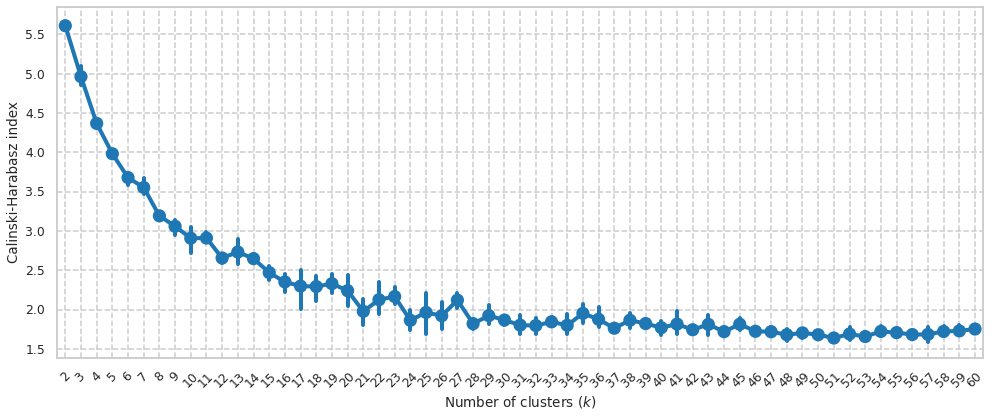

In [41]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="ch_score")
    ax.set_ylabel("Calinski-Harabasz index")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

# Stability

## Group ensemble by n_clusters

In [42]:
parts = ensemble.groupby("n_clusters").apply(
    lambda x: np.concatenate(x["partition"].apply(lambda x: x.reshape(1, -1)), axis=0)
)

In [43]:
parts.head()

n_clusters
2    [[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3    [[0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 2.0,...
4    [[1.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 1.0, 2.0,...
5    [[2.0, 2.0, 1.0, 4.0, 4.0, 2.0, 3.0, 2.0, 1.0,...
6    [[3.0, 5.0, 3.0, 2.0, 1.0, 2.0, 5.0, 3.0, 5.0,...
dtype: object

In [44]:
assert np.all(
    [
        parts.loc[k].shape == (CLUSTERING_OPTIONS["N_REPS_PER_K"], data.shape[0])
        for k in parts.index
    ]
)

## Compute stability

In [45]:
from sklearn.metrics import adjusted_rand_score as ari
from scipy.spatial.distance import pdist

In [46]:
parts_ari = pd.Series(
    {k: pdist(parts.loc[k], metric=ari) for k in parts.index}, name="k"
)

In [47]:
parts_ari_stability = parts_ari.apply(lambda x: x.mean())
display(parts_ari_stability.sort_values(ascending=False).head(15))

57    0.015649
49    0.012569
27    0.012475
59    0.012106
56    0.011622
17    0.011603
55    0.009326
32    0.008810
58    0.008311
60    0.008230
28    0.008159
41    0.007934
44    0.007624
24    0.007321
25    0.006842
Name: k, dtype: float64

In [48]:
parts_ari_df = pd.DataFrame.from_records(parts_ari.tolist()).set_index(
    parts_ari.index.copy()
)

In [49]:
parts_ari_df.shape

(59, 10)

In [50]:
assert (
    int(
        (CLUSTERING_OPTIONS["N_REPS_PER_K"] * (CLUSTERING_OPTIONS["N_REPS_PER_K"] - 1))
        / 2
    )
    == parts_ari_df.shape[1]
)

In [51]:
parts_ari_df.head()

,0,1,2,3,4,5,6,7,8,9
2,0.004575,-0.001403,0.000872,-0.000229,0.012967,0.007184,0.003922,0.008123,0.011247,0.006925
3,0.007786,0.003076,0.003393,0.004426,0.003468,0.009116,0.003418,0.001460,0.011292,0.008124
4,0.003816,0.007899,0.006219,0.002371,0.001225,0.004297,0.006842,0.005462,0.000777,0.004344
5,0.007857,0.005604,0.004941,0.021931,0.001303,0.004390,0.003298,0.005266,0.005663,0.002131
6,0.002016,0.004917,0.018378,0.002093,0.008865,0.005421,0.003268,0.002995,0.004975,0.005909


## Save

In [52]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        CLUSTERING_OPTIONS,
        prefix=f"{clustering_method_name}-stability-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/opt/data/results/clustering/null_sims/shuffle_genes/runs/z_score_std-projection-smultixcan-efo_partial-mashr-zscores/KMeans-stability-KMEANS_N_INIT_10-K_MAX_60-K_MIN_2-N_REPS_PER_K_5.pkl')

In [53]:
parts_ari_df.to_pickle(output_filename)

## Stability plot

In [54]:
parts_ari_df_plot = (
    parts_ari_df.stack()
    .reset_index()
    .rename(columns={"level_0": "k", "level_1": "idx", 0: "ari"})
)

In [55]:
parts_ari_df_plot.dtypes

k        int64
idx      int64
ari    float64
dtype: object

In [56]:
parts_ari_df_plot.head()

,k,idx,ari
0,2,0,0.004575
1,2,1,-0.001403
2,2,2,0.000872
3,2,3,-0.000229
4,2,4,0.012967


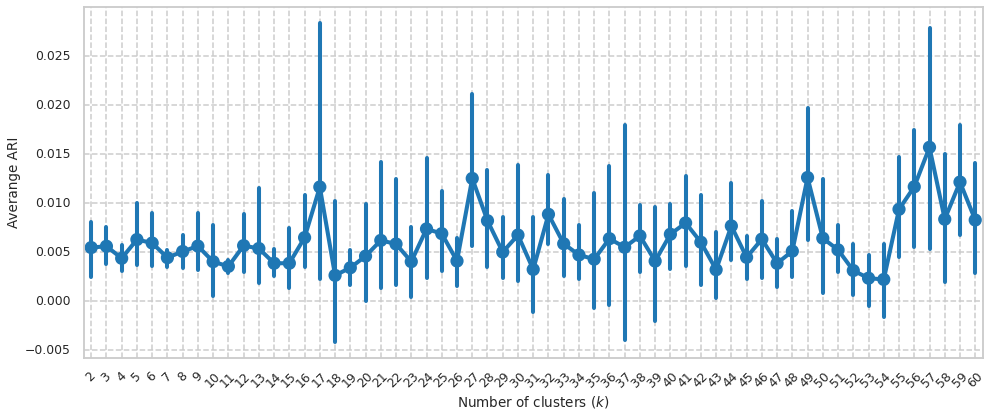

In [57]:
# with sns.axes_style('whitegrid', {'grid.linestyle': '--'}):
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=parts_ari_df_plot, x="k", y="ari")
    ax.set_ylabel("Averange ARI")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    #     ax.set_ylim(0.0, 1.0)
    #     ax.set_xlim(CLUSTERING_OPTIONS['K_MIN'], CLUSTERING_OPTIONS['K_MAX'])
    plt.grid(True)
    plt.tight_layout()